In [44]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunction as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
PATH = "./matrix/"

In [47]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

# Experiments on Matrix M1

In [48]:
errorsCG = []
gradientsCG = []

In [49]:
f = nf.normFunction(M1)

In [50]:
initial_vector = f.init_x()

In [51]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 455.7441, gradientNorm = 73.175247
Iteration number 2, -f(x) = 776.2575, gradientNorm = 29.968328
Iteration number 3, -f(x) = 875.3452, gradientNorm = 14.785849
Iteration number 4, -f(x) = 928.2360, gradientNorm = 6.954498
Iteration number 5, -f(x) = 945.0156, gradientNorm = 4.120575
Iteration number 6, -f(x) = 955.9724, gradientNorm = 3.690520
Iteration number 7, -f(x) = 968.6152, gradientNorm = 3.021360
Iteration number 8, -f(x) = 978.8050, gradientNorm = 2.377513
Iteration number 9, -f(x) = 988.9025, gradientNorm = 1.800617
Iteration number 10, -f(x) = 997.0577, gradientNorm = 1.341379
Iteration number 11, -f(x) = 1003.9367, gradientNorm = 0.969511
Iteration number 12, -f(x) = 1008.3467, gradientNorm = 0.647150
Iteration number 13, -f(x) = 1010.8654, gradientNorm = 0.438318
Iteration number 14, -f(x) = 1012.1191, gradientNorm = 0.277961
Iteration number 15, -f(x) = 1012.6643, gradientNorm = 0.186456
Iteration number 16, -f(x) = 1012.9430, gradientNorm = 0

In [52]:
norm = la.norm(M1, ord=2) ** 2

In [53]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [54]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [55]:
errorsCG[-1][-1]

7.231523611195372e-13

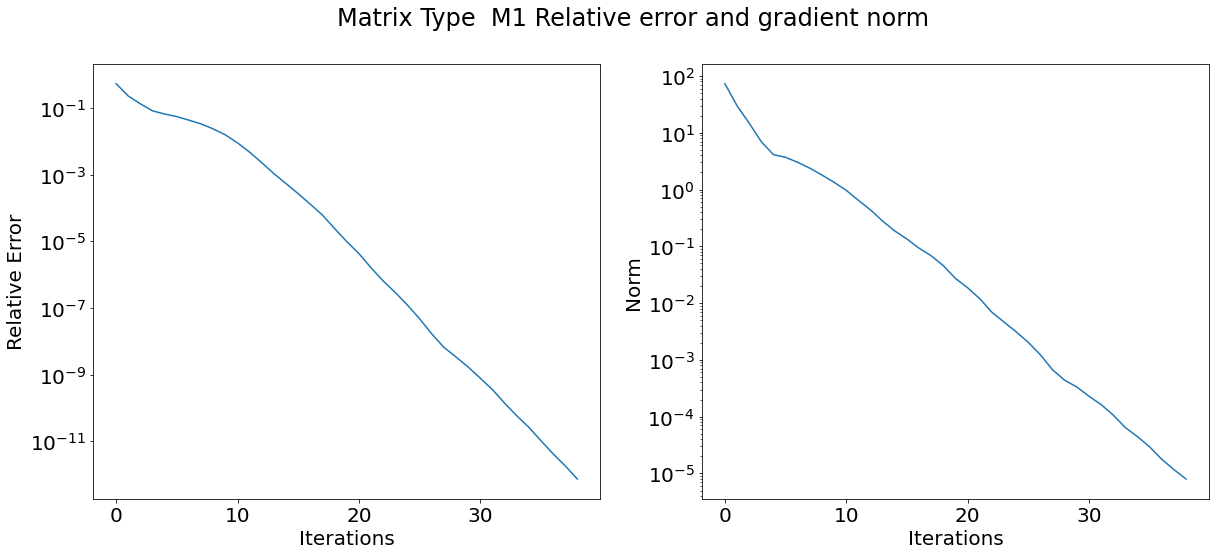

In [56]:
make_plot(gradientsCG, errorsCG,type='M1', experiment_name='exp1-M1-CG-FR')

In [15]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M1)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

4.83 ms ± 1.57 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [20]:
from scipy.optimize import minimize

In [21]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

174 ms ± 11.7 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M2

In [22]:
errorsCG = []
gradientsCG = []

In [23]:
f = nf.normFunction(M2)

In [24]:
initial_vector = f.init_x()

In [25]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 2088.3937, gradientNorm = 170.479271
Iteration number 2, -f(x) = 2355.4440, gradientNorm = 72.162552
Iteration number 3, -f(x) = 2469.4396, gradientNorm = 42.311671
Iteration number 4, -f(x) = 2528.7688, gradientNorm = 27.605170
Iteration number 5, -f(x) = 2573.9660, gradientNorm = 14.760500
Iteration number 6, -f(x) = 2590.0531, gradientNorm = 7.765354
Iteration number 7, -f(x) = 2597.9676, gradientNorm = 6.315524
Iteration number 8, -f(x) = 2606.6062, gradientNorm = 6.854271
Iteration number 9, -f(x) = 2619.6643, gradientNorm = 6.207507
Iteration number 10, -f(x) = 2631.2786, gradientNorm = 3.968444
Iteration number 11, -f(x) = 2637.7045, gradientNorm = 2.318439
Iteration number 12, -f(x) = 2640.7356, gradientNorm = 1.385254
Iteration number 13, -f(x) = 2641.8672, gradientNorm = 0.782293
Iteration number 14, -f(x) = 2642.3016, gradientNorm = 0.549244
Iteration number 15, -f(x) = 2642.5341, gradientNorm = 0.378014
Iteration number 16, -f(x) = 2642.6350, gra

In [26]:
norm = la.norm(M2, ord=2) ** 2

In [27]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [28]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [ ]:
errorsCG[-1][-1]

In [ ]:
make_plot(gradientsCG, errorsCG,type='M2', experiment_name='exp1-M2-CG-FR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M2)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [57]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

# Experiments on Matrix M3

In [ ]:
errorsCG = []
gradientsCG = []

In [ ]:
f = nf.normFunction(M3)

In [ ]:
initial_vector = f.init_x()

In [ ]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
norm = la.norm(M3, ord=2) ** 2

In [ ]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [ ]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [ ]:
errorsCG[-1][-1]

In [ ]:
make_plot(gradientsCG, errorsCG, type='M3', experiment_name='exp1-M3-CG-FR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M3)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

# Experiments on Matrix M4

In [29]:
errorsCG = []
gradientsCG = []

In [30]:
f = nf.normFunction(M4)

In [31]:
initial_vector = f.init_x()

In [32]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

Iteration number 1, -f(x) = 50.5822, gradientNorm = 25.090792
Iteration number 2, -f(x) = 2132.1290, gradientNorm = 3.357652
Iteration number 3, -f(x) = 2371.7771, gradientNorm = 1.817650
Iteration number 4, -f(x) = 2516.6448, gradientNorm = 0.742998
Iteration number 5, -f(x) = 2567.1248, gradientNorm = 0.493553
Iteration number 6, -f(x) = 2588.3988, gradientNorm = 0.549549
Iteration number 7, -f(x) = 2612.5883, gradientNorm = 0.322720
Iteration number 8, -f(x) = 2630.2173, gradientNorm = 0.252278
Iteration number 9, -f(x) = 2637.0851, gradientNorm = 0.165745
Iteration number 10, -f(x) = 2644.3027, gradientNorm = 0.127639
Iteration number 11, -f(x) = 2646.8832, gradientNorm = 0.092724
Iteration number 12, -f(x) = 2648.9882, gradientNorm = 0.059568
Iteration number 13, -f(x) = 2649.7059, gradientNorm = 0.046039
Iteration number 14, -f(x) = 2650.1496, gradientNorm = 0.024138
Iteration number 15, -f(x) = 2650.2840, gradientNorm = 0.020414
Iteration number 16, -f(x) = 2650.3771, gradientNo

In [33]:
norm = la.norm(M4, ord=2) ** 2

In [34]:
norm

2650.5177433377776

In [35]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [36]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [37]:
errorsCG[-1][-1]

1.1251854789804162e-11

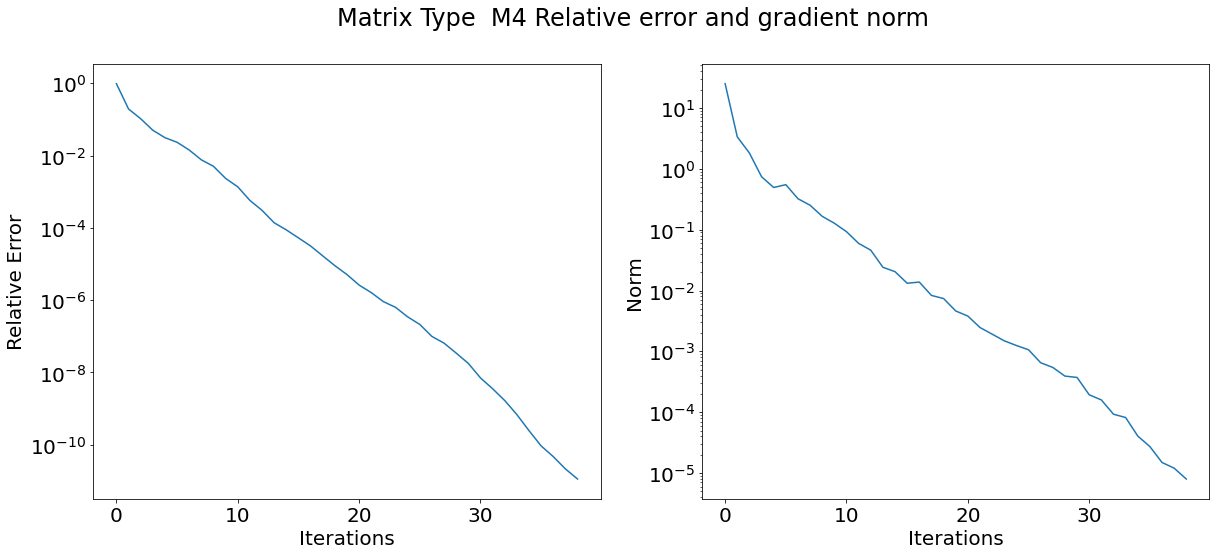

In [38]:
make_plot(gradientsCG, errorsCG, type='M4', experiment_name='exp1-M4-CG-FR')

In [39]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M4)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

52.8 ms ± 9.88 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [40]:
from scipy.optimize import minimize

In [43]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun

94.2 ms ± 17.8 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Experiments on Matrix M5

In [ ]:
errorsCG = []
gradientsCG = []

In [ ]:
f = nf.normFunction(M5)

In [ ]:
initial_vector = f.init_x()

In [ ]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = True)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
norm = la.norm(M5, ord=2) ** 2

In [ ]:
norm

In [ ]:
# Norm and errors SGD
normsCG = np.array(normsCG)
gradientsCG.insert(0,np.array(gradientCG))
size1 = normsCG.size

In [ ]:
normvec = np.ones(size1) * norm
errorsCG.insert(0, (abs(normsCG - normvec) / abs(normvec)))

In [ ]:
errorsCG[-1][-1]

In [ ]:
make_plot(gradientsCG, errorsCG, type='M5', experiment_name='exp1-M5-CG-FR')

In [ ]:
%%timeit -r 100 -n 10
# Optimizer SGD
f = nf.normFunction(M5)
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [ ]:
from scipy.optimize import minimize

In [ ]:
%%timeit -r 100 -n 10
res = minimize(f.func_, initial_vector, method='CG', jac=f.func_grad_, tol=1e-5, options = {'maxiter' : 500})
value = -res.fun